# Fitting over and undercoupled resonators in reflection

Ql: loaded quality factor,
Qc: coupling quality factor,
Qi: internal quality factor.
overcoupled regime: Qc<Qi, for Qc<<Qi we have Qc~Ql and the S11 shows only a phase signal.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
%matplotlib inline

## Case1: Undercoupled resonator Qc>Qi

First, we generate some fake data which we can fit later:

In [3]:
from resonator_tools import circuit
fr = 7e9  #resonance frequency in Hz
Qi = 200e3
Qc = 400e3
freq = np.linspace(fr-0.5e6, fr+0.5e6, 1000)
port1 = circuit.reflection_port()  #define a reflection port
noise = np.random.normal(loc=1.0,scale=0.01,size=(len(freq),))
S11 = noise * port1._S11_directrefl(freq,fr=fr,Ql=Qi*Qc/(Qc+Qi),Qc=Qc,a=1.,alpha=0.,delay=.0)
port1.add_data(freq,S11)

Let's plot the data:

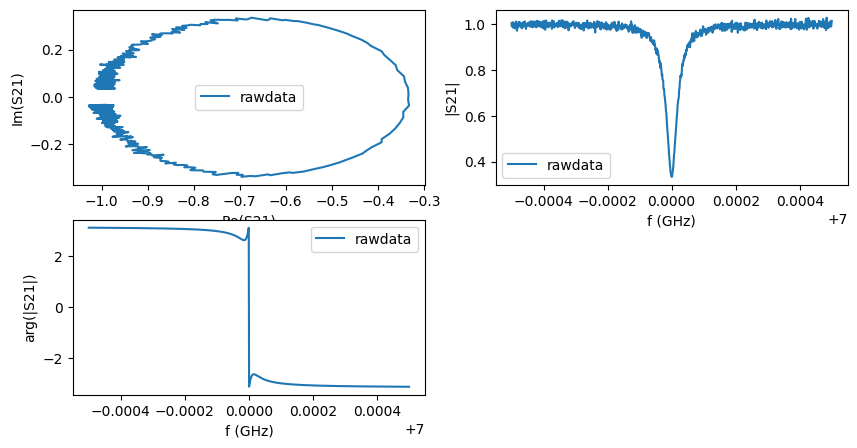

In [4]:
plt.rcParams["figure.figsize"] = [10,5]
port1.plotrawdata()

...and fit it: (since we know the electric delay, we tell it the program, this makes it more accurate)

In [5]:
port1.autofit(electric_delay=0.)

...and plot the result:

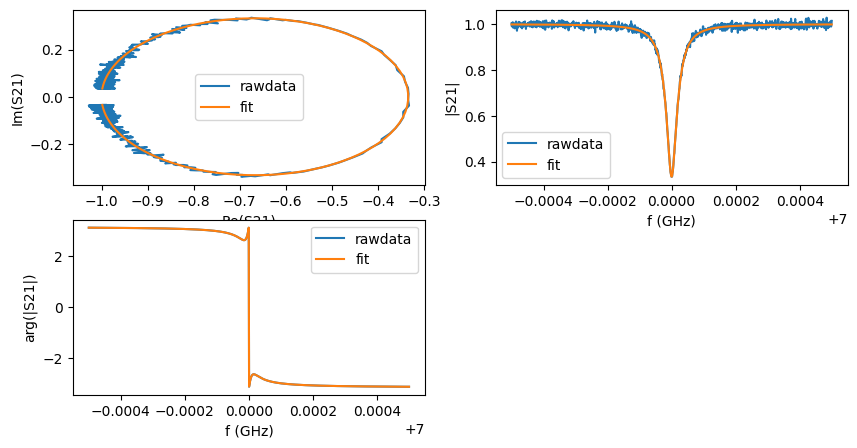

In [6]:
port1.plotall()

Next, let us have a look at the fit results. Here, we convert the dictionary of results into a dataframe to display it in a nicer way.

In [7]:
display(pd.DataFrame([port1.fitresults]).applymap(lambda x: "{0:.2e}".format(x)))

C:\Users\chhagen\AppData\Local\Temp\ipykernel_15108\1469808684.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  display(pd.DataFrame([port1.fitresults]).applymap(lambda x: "{0:.2e}".format(x)))


,Qi,Qc,Ql,fr,theta0,Ql_err,Qc_err,fr_err,chi_square,Qi_err
0,1.99e+05,3.99e+05,1.33e+05,7.00e+09,4.02e-04,6.03e+02,1.25e+03,9.17e+01,9.37e-05,1.14e+03


Finally, we can calculate the single photon limit, i.e., the input power necessary to maintain one photon on average in the resonator:

In [8]:
print('Single photon limit: %.2f dBm' % port1.get_single_photon_limit())

Single photon limit: -149.39 dBm


Or, we can compute the photons in the resonator for a given power:

In [9]:
print('At -100dBm, we have %.2e photons in the resonator' % port1.get_photons_in_resonator(-100))

At -100dBm, we have 8.68e+04 photons in the resonator


## Case2: Strongly over coupled resonator Qc<<Qi

Here, we study the case where internal losses become negigible, and the amplitude signal vanishes.

First, we generate some fake data which we can fit later:

In [22]:
from resonator_tools import circuit
fr = 7e9  #resonance frequency in Hz
Qi = 10000e3
Qc = 100e3
freq = np.linspace(fr-0.5e6, fr+0.5e6, 1000)
port2 = circuit.reflection_port()  #define a reflection port
noise = np.random.normal(loc=1.,scale=0.04,size=(len(freq),))
S11 = noise * port1._S11_directrefl(freq,fr=fr,Ql=Qi*Qc/(Qc+Qi),Qc=Qc,a=1.,alpha=0.,delay=.0)
port2.add_data(freq,S11)

Let's plot the data:

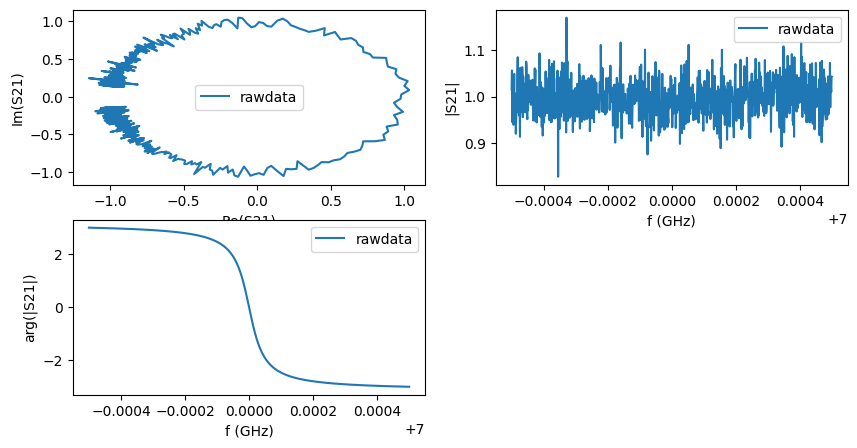

In [23]:
port2.plotrawdata()

Here, we see that the amplitude signal completely vanishes in the noise

Fit the signal:

IMPORTANT: In the presence of a lot of noise, it is necessary to specify the electric delay by hand

In [24]:
port2.autofit(electric_delay=0.)

c:\Users\chhagen\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


...and plot the result:

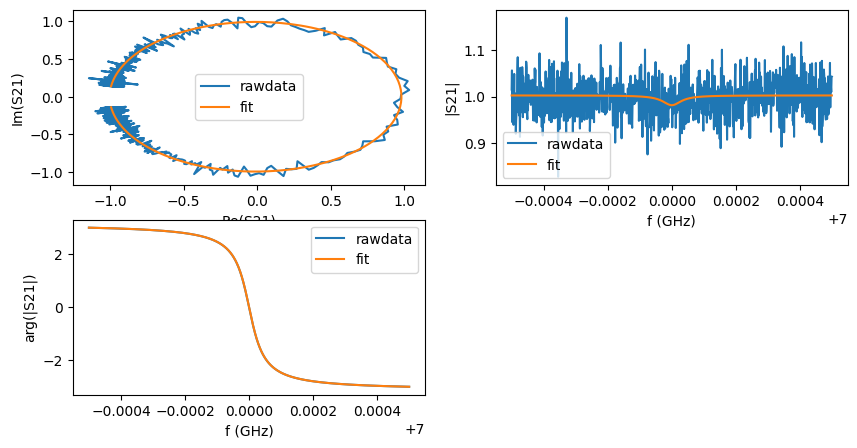

In [25]:
port2.plotall()

Next, let us have a look at the fit results. Here, we convert the dictionary of results into a dataframe to display it in a nicer way.

In [26]:
display(pd.DataFrame([port2.fitresults]).applymap(lambda x: "{0:.2e}".format(x)))

C:\Users\chhagen\AppData\Local\Temp\ipykernel_15108\2938230112.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  display(pd.DataFrame([port2.fitresults]).applymap(lambda x: "{0:.2e}".format(x)))


,Qi,Qc,Ql,fr,theta0,Ql_err,Qc_err,fr_err,chi_square,Qi_err
0,9.41e+06,1.00e+05,9.90e+04,7.00e+09,-4.43e-03,5.18e+02,3.76e+02,1.36e+02,1.52e-03,3.25e+06


Finally, we can calculate the single photon limit, i.e., the input power necessary to maintain one photon on average in the resonator:

In [27]:
print('Single photon limit: %.2f dBm' % port2.get_single_photon_limit())

Single photon limit: -152.84 dBm


Or, we can compute the photons in the resonator for a given power:

In [28]:
print('At -100dBm, we have %.2e photons in the resonator' % port2.get_photons_in_resonator(-100))

At -100dBm, we have 1.92e+05 photons in the resonator
